<h3> Before anything I wanted to shoutout <a href="https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/"> this Kernel by Janio Martinez </a> </h3>
    
It has been huge in helping me understand what was going on and was also a great source for other references that I could use to understand how to apply machine learning concepts to imbalanced datasets.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Classifier Library
from sklearn.linear_model import LogisticRegression

# Model Selection & Pipelines
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.model_selection import KFold, StratifiedKFold

# Metrics
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# Only when working on Colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Only on Colab
#path = "/content/drive/My Drive/Colab Notebooks/creditcard.csv"
path = 'creditcard.csv'

In [0]:
data = pd.read_csv(path)

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


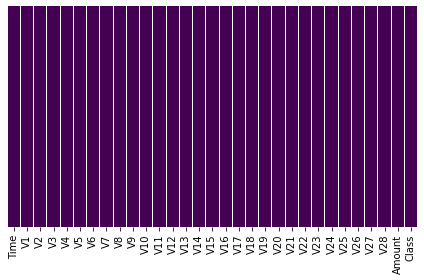

In [11]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.tight_layout()

# There are no missing values in the dataset.


AxesSubplot(0.125,0.125;0.775x0.755)


0    99.827251
1     0.172749
Name: Class, dtype: float64

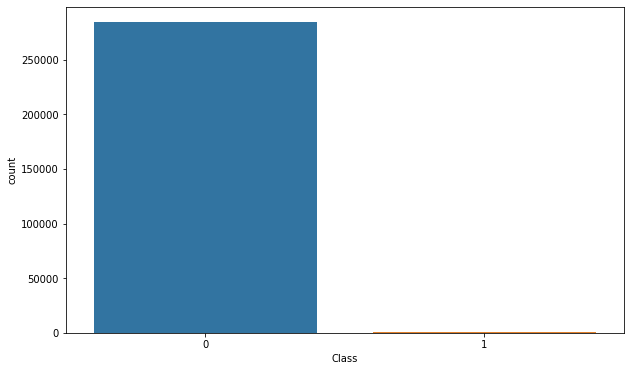

In [12]:
plt.figure(figsize=(10,6))
print(sns.countplot(x='Class', data=data))
data['Class'].value_counts(normalize=True) * 100

# Dataset is highly imbalanced
<h3> 99.83% Non-Fraudulent Transactions

0.173% Fraudulent Transactions

Hence, we require either oversampling or undersampling </h3>

# Distribution of Amount & Time columns

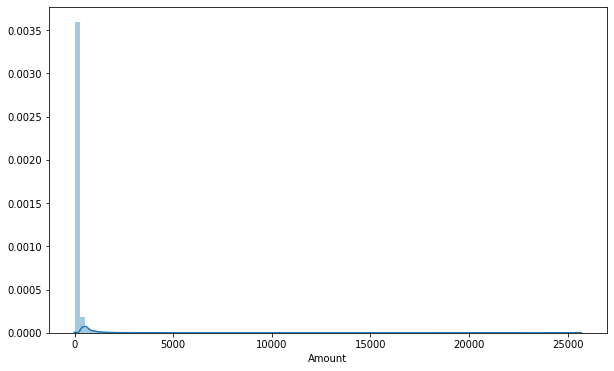

In [13]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Amount'], bins=100)

<h3> Amount of transactions are generally very low, most are less than 1000 and max. tend to be around 1500 </h3>

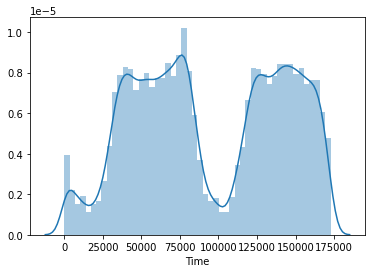

In [14]:
sns.distplot(data['Time'])

# Performing train test split

Setting the stratify parameter of train_test_split to y <br> This will ensure that y_train and y_test will have approximately the same distribution of labels (i.e. Fraud and Non-Fraud Transactions) as you can see in the output

In [15]:
X = data.drop('Class', axis=1)
y = data['Class']

# train_index and test_index are a list of indices obtained from the StratifiedKFold.split() method
# We perform iloc on the X and y dataframes to get X_train, X_test and y_train, y_test
# and both y_test and y_train have same distribution of 0 and 1 class values, i.e, approx. 99.82% and 0.17% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    
print("Class Label Distribution for y_train: ")
print(y_train.value_counts(normalize=True))
print("Class Label Distribution for y_test: ")
print(y_test.value_counts(normalize=True))

Class Label Distribution for y_train: 
0    0.998271
1    0.001729
Name: Class, dtype: float64
Class Label Distribution for y_test: 
0    0.99828
1    0.00172
Name: Class, dtype: float64


<h2> Thus we get train and test splits with the same mean value for the response variable (Class) </h2>

A tip that I found while researching on how to implement a model on such a dataset is that instead of directly scaling the entire dataset using one of the scaler objects, you should perform the foll. steps:
1. Perform train test split
2. Fit the Scaler object on the train data
3. Now scale the train as well as the test data on this Scaler that was fit on the <b> train data only. </b>

The reason why you should do this is that now, scaling is done using the information obtained from the training data only thereby reducing the bias that would been incurred had we directly scaled the entire dataset at once.

In [16]:
from sklearn.preprocessing import RobustScaler

# Using RobustScaler as it is less prone to outliers
'''
rob_scaler_time = RobustScaler().fit(X_train['Time'].values.reshape(-1, 1))
X_train['Scaled_Time'] = rob_scaler_time.transform(X_train['Time'].values.reshape(-1, 1))
X_test['Scaled_Time'] = rob_scaler_time.transform(X_test['Time'].values.reshape(-1, 1))

rob_scaler_amount = RobustScaler().fit(X_train['Amount'].values.reshape(-1, 1))
X_train['Scaled_Amount'] = rob_scaler_amount.transform(X_train['Amount'].values.reshape(-1, 1))
X_test['Scaled_Amount'] = rob_scaler_amount.transform(X_test['Amount'].values.reshape(-1, 1))
'''

rob_scaler = RobustScaler().fit(X_train)
X_train = pd.DataFrame(rob_scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(rob_scaler.transform(X_test), columns=X.columns)

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.641421,-0.294988,0.413458,-0.032789,0.004210,0.500328,-0.242496,0.196974,0.696049,-0.617665,-0.335099,0.305739,0.618757,0.061512,0.815910,-0.374609,-0.283471,-0.037905,0.003444,1.617528,0.220855,-0.077712,-0.350440,0.116067,-0.526715,-1.197828,0.615020,0.135918,0.229172,-0.278736
1,0.750735,0.037697,0.449843,-0.971235,-0.956625,2.444562,2.982501,0.286114,1.675102,-0.088890,-0.719076,0.112365,-0.288053,-0.314590,-0.871680,0.086888,0.150875,0.470616,-0.370647,-0.441916,0.354656,-0.729363,-0.853686,0.438042,0.695549,-0.654086,0.378558,1.494765,0.461935,-0.219037
2,-0.178572,-0.154915,-0.010093,0.340525,-0.819276,0.210600,0.606300,-0.079865,0.110888,-1.216843,0.790899,-0.300463,-0.659608,0.193111,0.119254,0.436899,-0.919432,-0.699821,2.218661,1.109211,-0.597523,-0.961736,-0.830328,-0.532988,-1.794872,-0.629461,1.888932,-0.508622,0.889157,0.027554
3,0.517676,0.634041,-0.325196,-1.840756,0.560631,0.648053,-0.950924,0.883454,-0.982338,0.080977,-1.304062,0.186330,-0.277546,0.389890,-3.215509,0.412567,0.844745,2.541391,0.909302,-0.608929,2.047637,0.250536,-0.373262,-0.784804,0.548336,0.007712,1.197762,-0.797517,0.406419,4.494573
4,0.284688,-0.199290,0.387080,1.550556,3.067828,0.260536,2.593476,-0.837319,0.589753,0.953375,1.016538,-0.985191,-2.560178,2.373631,-0.457124,-1.568630,-0.405744,1.112671,0.825170,1.745461,0.932465,-0.128909,0.664676,-1.077511,0.025314,-0.676698,0.922971,0.087828,-0.605274,0.103117


In [0]:
# X_train.drop(['Time','Amount'], axis=1, inplace=True)
# X_test.drop(['Time','Amount'], axis=1, inplace=True)

In [17]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.312419,-0.358621,0.566127,0.891499,0.797379,0.951619,-0.223320,0.788178,-0.383210,-0.829211,0.298189,-0.772153,-0.934666,-0.350832,-0.012238,-0.113759,0.916755,-1.251407,-0.181395,-1.524922,0.080808,-0.343895,-0.569257,-0.450022,-0.288431,-0.009853,-0.560430,-0.790662,-0.927928,-0.295822
1,0.806463,0.752976,-1.613893,-1.064401,-0.925891,-0.834570,-0.544815,-0.259255,-0.722490,-1.508792,1.829000,0.393695,-0.713554,-0.142158,0.367030,-0.431300,-0.361622,0.233567,0.316389,0.233465,0.719242,-0.155541,-0.607888,-0.060836,-0.533619,-0.479422,-0.517060,-0.571969,-0.209648,4.359331
2,-0.519524,-1.235410,-1.404099,0.534067,-2.645067,-0.394531,1.534931,-0.249617,1.603241,1.105248,-1.584098,0.721337,0.808193,-0.994567,-0.280774,-0.040441,-3.129404,1.133468,0.026220,-2.088066,-2.770040,-1.117262,-0.193539,0.420034,-1.783412,0.629788,-1.591467,0.555950,-2.178383,2.498329
3,0.533468,0.023291,0.580309,-0.432353,0.605882,1.174099,-0.216918,1.165320,-1.122031,-0.082666,0.690707,-0.952704,-0.075729,0.502814,-0.118439,-0.252899,-1.094940,-0.250428,-0.312578,0.981107,0.372293,0.030223,0.420235,-0.967165,-0.988434,0.427665,-0.565528,-0.944246,-1.406849,-0.010585
4,0.809565,-1.974471,1.053335,-1.311811,0.029754,-1.078799,-0.157225,-0.537973,3.951702,-0.904310,-2.452372,0.218263,1.700057,0.928589,0.017474,-0.739516,0.789438,2.288655,0.842616,1.009732,-2.456739,0.076383,-0.603791,-3.232351,-0.553785,0.880430,0.173902,-6.671874,-5.147853,1.922563


# <u> Hyperparameter Tuning of Logistic Regresion Model using Random Search</u>
<h3> <a href="https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search"> This banger of a notebook by Will Koehrsen helped me a lot in understanding atleast the basics of hyperparameter tuning </a></h3>

# Basic Hyperparameter Tuning components
Objective function: takes in hyperparameters and returns the cross validation score we want to maximize or minimize

Domain of hyperparameters: values over which we want to search

Algorithm: method for selecting the next hyperparameter values to evaluate in the objective function

Results: history of hyperparameters and cross validation scores

# Grid Search
For a given model, it takes in the domain of hyperparameter values and checks every possible combination to find which settings perform the best on an evaluation score specified. Very time consuming.


# Random Search
It takes in the domain as well, but it randomly selects the set of hyperparameters from the search space. Results in more evenly spaced out hyperparameter values and gives similar results to Grid Search albeit a bit lower. 
Generally used on an unknown dataset in order to get rough estimate of the domain in which the model performs well and then Grid Search can be implemented to increase the accuracy further. <br>Although in this model, I didn't really make the full use of the results of RandomSearch for GridSearch and just used the basic inbuilt functions.

# Logistic Regression Hyperparameters
<h3> I tuned just the penalty and C parameters </h3>

Here is the docstring for the listed parameters

1. penalty : str, 'l1', 'l2', 'elasticnet' or 'none', optional (default='l2')
    Used to specify the norm used in the penalization. The 'newton-cg',
    'sag' and 'lbfgs' solvers support only l2 penalties. 'elasticnet' is
    only supported by the 'saga' solver. If 'none' (not supported by the
    liblinear solver), no regularization is applied.

    .. versionadded:: 0.19
       l1 penalty with SAGA solver (allowing 'multinomial' + L1)

2. C : float, optional (default=1.0)
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify stronger
    regularization.

3. solver : str, {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'},              optional (default='liblinear').

    Algorithm to use in the optimization problem.

    - For small datasets, 'liblinear' is a good choice, whereas 'sag' and
      'saga' are faster for large ones.
    - For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs'
      handle multinomial loss; 'liblinear' is limited to one-versus-rest
      schemes.
    - 'newton-cg', 'lbfgs', 'sag' and 'saga' handle L2 or no penalty
    - 'liblinear' and 'saga' also handle L1 penalty
    - 'saga' also supports 'elasticnet' penalty
    - 'liblinear' does not handle no penalty

    Note that 'sag' and 'saga' fast convergence is only guaranteed on
    features with approximately the same scale. You can
    preprocess the data with a scaler from sklearn.preprocessing.

    .. versionadded:: 0.17
       Stochastic Average Gradient descent solver.
    .. versionadded:: 0.19
       SAGA solver.
    .. versionchanged:: 0.20
        Default will change from 'liblinear' to 'lbfgs' in 0.22.

<h3> Hyperparameter grid dictionary: </h3>

penalty takes values l1 and l2 which are the only two options available

C is a list of 10 numbers containing the logspace from log10(0.001) to log10(1000) <br> Logspace is generally used for such parameters because we can cover a big range in a reasonable way in way fewer numbers as compared to something like a uniform distribution which is great for performing initial analysis and thus get a rough estimate of the best performing range for the parameter and then focus on it using other distributions.

<h3> Setting up RandomizedSearchCV object </h3>
We give the function, <br> the model for classification (LogisticRegression)<br> the hyperparameter grid (log_reg_params) <br> n_jobs = Number of jobs to run in parallel (-1 to use all processors) <br> n_iter trades off runtime vs quality of the solution.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# can also add the 'solver' parameter with values of liblinear and saga to the dictionary later 'solver': ['liblinear', 'saga']}

rand_log_reg_params = {"penalty": ['l1', 'l2'], 'C': list(np.logspace(np.log10(0.001), np.log10(1000), num=10))} 
# It contains the estimator (LogisticRegression in our case and also the dictionary of hyperparameters)
rand_log_reg = RandomizedSearchCV(LogisticRegression(), rand_log_reg_params, n_iter=50, verbose=5, n_jobs=-1)
rand_log_reg

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.004641588833612777,
                                              0.021544346900318832, 0.1,
                                              0.46415888336127775,
                                              2.154434690031882, 

# Cross Validation
# k-Fold Cross Validation Algorithm (used to prevent overfitting)
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    
    3.1. Take the group as a hold out or test data set
    
    3.2. Take the remaining groups as a training data set
    
    3.3. Fit a model on the training set and evaluate it on the test set
    
    3.4. Retain the evaluation score and discard the model
    
4. Summarize the skill of the model using the sample of model evaluation scores

# Stratified k-Fold Cross Validation
In stratified k-fold cross-validation, the folds are selected so that "***the mean response value is approximately equal in all the folds***". In the case of a dichotomous classification, this means that each fold contains roughly the same proportions of the two types of class labels.

In [0]:
# Defining lists which will contain various metric values as cross-validation progresses
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Handling imbalance: Undersampling vs Oversampling
<h3> Undersampling </h3>
Undersampling techniques remove examples from the training dataset that belong to the majority class in order to better balance the class distribution, such as reducing the skew from a 1:100 to a 1:10, 1:2, or even a 1:1 class distribution. 

<h3> Oversampling </h3>
This is different from oversampling that involves adding examples to the minority class in an effort to reduce the skew in the class distribution.

Oversampling techniques are generally preferred over Undersampling techniques because they balance the dataset and at the same time do not result in loss of relevant data that Undersampling ends up doing. One of the primary reasons where undersampling comes into picture is when the data is very huge (containing sufficient minority examples) and minimizing cost of the project is a big factor.

# SMOTE <a href="http://rikunert.com/SMOTE_explained"> (Reference)</a>
One of the most commonly used Oversampling techniques is <b> Synthetic Minority Oversampling Technique - SMOTE </b> <br>

SMOTE synthesises new minority instances between existing (real) minority instances.

Imagine that SMOTE draws lines between existing minority instances like this.
![SMOTE_Visualisation_1.jpg](attachment:SMOTE_Visualisation_1.jpg)

SMOTE then imagines new, synthetic minority instances somewhere on these lines.
![SMOTE_Visualisation_2.jpg](attachment:SMOTE_Visualisation_2.jpg)

# Oversampling with Cross-Validation & Data Leakage
You have to perform Oversampling within the Cross-Validation itself and not before it, otherwise it would lead to data leakage. 

This is because it is possible that by Oversampling before, you are pretty much duplicating data from one fold to another, which could end up being in the test fold, and due to this, the test data is not really unseen and it could lead to overfitting.

<h3> Oversampling before Cross Validation (Wrong Way) </h3>

![Oversampling%20+%20Cross%20Validation.jpg](attachment:Oversampling%20+%20Cross%20Validation.jpg)

<h3> Oversampling during Cross Validation (Right Way) </h3>

![Oversampling%20in%20Cross%20Validation.jpg](attachment:Oversampling%20in%20Cross%20Validation.jpg)

In [20]:
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE

# Stratified 5 Fold
sss = StratifiedKFold(n_splits=5, random_state=None)

smote_model = SMOTE(sampling_strategy='minority', random_state=42)

# Takes a lot of time to execute
for train, test in sss.split(X_train, y_train):
    # SMOTE happens during Cross Validation not before
    pipeline = make_pipeline_imb(SMOTE(sampling_strategy='minority'), rand_log_reg) 
    
    # Time consuming step
    model = pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    best_est_rand = rand_log_reg.best_estimator_
        
    # Testing the best estimator (best_est) on the best performing set of parameters (inherently done by predict method)
    prediction = best_est_rand.predict(X_train.iloc[test])
    
    # Appending metric scores to their respective list
    accuracy_lst.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision_lst.append(precision_score(y_train.iloc[test], prediction))
    recall_lst.append(recall_score(y_train.iloc[test], prediction))
    f1_lst.append(f1_score(y_train.iloc[test], prediction))
    auc_lst.append(roc_auc_score(y_train.iloc[test], prediction))

print("Cross Validation Oversampling Training with Metric Calculations Completed")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.2min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


Cross Validation Oversampling Training with Metric Calculations Completed


<h3> Best C Parameters obtained were around 0.0046 - 50, so we'll focus on this range while implementing GridSearch
<br><br>Best penalty obtained was l2 in all cases so I've used that for GridSearch </h3>

In [21]:
best_est_rand.get_params()

{'C': 1000.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

<h2> Printing the mean of the metric measures recorded in the lists </h2>

<h3> Average Recall is 91% <br> <br> Average ROC AUC is 94% </h3>

In [22]:
print("accuracy:", np.mean(accuracy_lst))
print("precision:", np.mean(precision_lst))
print("recall:", np.mean(recall_lst))
print("f1:", np.mean(f1_lst))
print("roc:", np.mean(auc_lst))

accuracy: 0.9759661173165968
precision: 0.0618570428982748
recall: 0.9060370009737099
f1: 0.11575083922535437
roc: 0.9410620783876752


<h3> On the actual test data X_test, we get Recall Score of 91% for Fraud Class</h3>

In [23]:
labels = ['No Fraud', 'Fraud']
rand_log_reg_predictions = best_est_rand.predict(X_test)
print(classification_report_imbalanced(y_test, rand_log_reg_predictions, target_names=labels))

                   pre       rec       spe        f1       geo       iba       sup

   No Fraud       1.00      0.97      0.92      0.99      0.95      0.90     56864
      Fraud       0.06      0.92      0.97      0.11      0.95      0.89        98

avg / total       1.00      0.97      0.92      0.99      0.95      0.90     56962



<h3> Average Precision-Recall Score on test data is 74% </h3>

In [24]:
from sklearn.metrics import average_precision_score

# In the case of logistic regression, the predict_proba function returns the value of "f(x)=1/1+e^(−(β0+β1x1+⋯+βkxk))"
# for given input X with k features

# The decision function returns the value of "d(x)=β0+β1x1+⋯+βkxk"
# The predict function returns 1 if value of predict_proba is > 0.5 else 0

y_score = best_est_rand.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.75


<h3> Plotting the Precision-Recall Curve </h3>

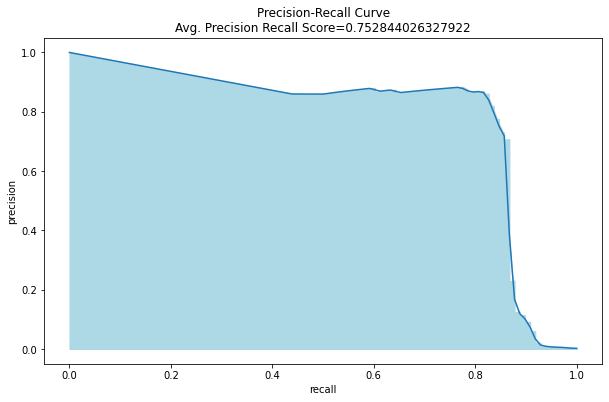

In [25]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_score)

precision_recall_df = pd.DataFrame({'precision': precision, 'recall': recall})

plot_title = 'Precision-Recall Curve\nAvg. Precision Recall Score=' + str(average_precision)
plt.figure(figsize=(10, 6))
sns.lineplot(x='recall',y='precision',data=precision_recall_df)
plt.title(plot_title)
plt.fill_between(recall, precision, color='lightblue')

# Plotting the ROC Curve

Text(0.5, 1.0, 'ROC Curve\nROC Score = 0.9725518566317917')

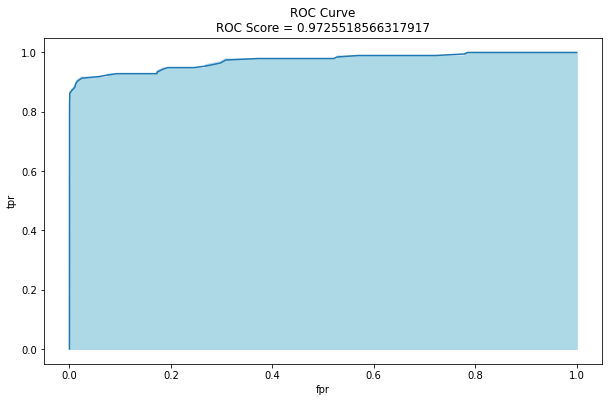

In [26]:
from sklearn.metrics import roc_curve


false_positive_rate, true_positive_rate, _ = roc_curve(y_test,  y_score)

auc = roc_auc_score(y_test, y_score)

roc_df = pd.DataFrame({'fpr': false_positive_rate, 'tpr': true_positive_rate})

plot_title = 'ROC Curve\nROC Score = ' + str(auc)

plt.figure(figsize=(10, 6))
sns.lineplot(x='fpr', y='tpr', data=roc_df)
plt.fill_between(roc_df['fpr'], roc_df['tpr'], color='lightblue')
plt.title(plot_title)

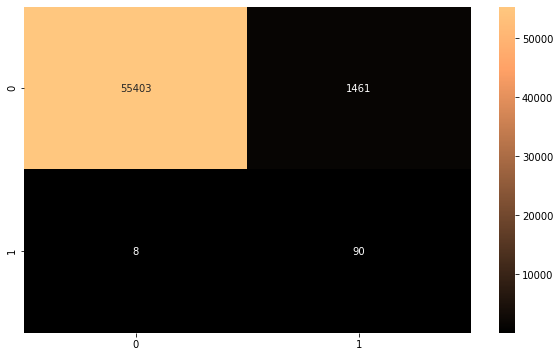

In [27]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix_log_reg = confusion_matrix(y_true=y_test, y_pred=rand_log_reg_predictions)

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix_log_reg, annot=True, cmap='copper', fmt='d')

# Using GridSearch to Fit the data and comparing with RandomSearch


In [28]:
from sklearn.model_selection import GridSearchCV

# Chose only l2 and logspace from 0 to 50 in order to focus our search
grid_log_reg_params = {"penalty": ['l2'], 'C': np.logspace(np.log10(0.001), np.log10(1000), 20)}

# Creating a GridSearchCV model using the new grid_log_reg_params
grid_log_reg = GridSearchCV(LogisticRegression(), grid_log_reg_params, verbose=5, n_jobs=-1)

grid_log_reg

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 2....90e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),

In [0]:
# Redefining metric lists
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

<h3> Performing Cross-Validation and Oversampling again using GridSearch

In [30]:
for train, test in sss.split(X_train, y_train):
    grid_pipeline = make_pipeline_imb(SMOTE(sampling_strategy='minority'), grid_log_reg) 
    
    # Time consuming step
    model = grid_pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    best_est_grid = grid_log_reg.best_estimator_
        
    # Testing the best estimator (best_est) on the best performing set of parameters (inherently done by predict method)
    prediction = best_est_grid.predict(X_train.iloc[test])
    
    # Appending metric scores to their respective list
    accuracy_lst.append(grid_pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision_lst.append(precision_score(y_train.iloc[test], prediction))
    recall_lst.append(recall_score(y_train.iloc[test], prediction))
    f1_lst.append(f1_score(y_train.iloc[test], prediction))
    auc_lst.append(roc_auc_score(y_train.iloc[test], prediction))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.2min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.0min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.7min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.9min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.8min finished


In [31]:
print("accuracy:", np.mean(accuracy_lst))
print("precision:", np.mean(precision_lst))
print("recall:", np.mean(recall_lst))
print("f1:", np.mean(f1_lst))
print("roc:", np.mean(auc_lst))

accuracy: 0.9759134499330685
precision: 0.06172138977555737
recall: 0.9060370009737099
f1: 0.11551526053722072
roc: 0.941035700075067


In [32]:
grid_log_reg_predictions = best_est_grid.predict(X_test)

print("Classification Report for RandomSearchCV")
print(classification_report_imbalanced(y_true=y_test, y_pred=rand_log_reg_predictions))

print("Classification Report for GridSearchCV")
print(classification_report_imbalanced(y_true=y_test, y_pred=grid_log_reg_predictions))


Classification Report for RandomSearchCV
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.97      0.92      0.99      0.95      0.90     56864
          1       0.06      0.92      0.97      0.11      0.95      0.89        98

avg / total       1.00      0.97      0.92      0.99      0.95      0.90     56962

Classification Report for GridSearchCV
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.97      0.92      0.99      0.95      0.90     56864
          1       0.06      0.92      0.97      0.11      0.95      0.89        98

avg / total       1.00      0.97      0.92      0.99      0.95      0.90     56962



<h3> Sadly, there was no improvement in the score, but oh well atleast I tried

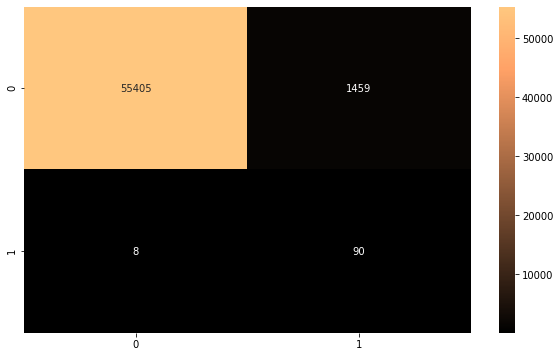

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix_log_reg = confusion_matrix(y_true=y_test, y_pred=grid_log_reg_predictions)

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix_log_reg, annot=True, cmap='copper', fmt='d')

<h2> Average Precision-Recall Score on test data is 74% </h2>

In [34]:
y_score = best_est_grid.predict_proba(X_test)[:, 1]

average_precision_score(y_test, y_score)

0.7526201967104448

<h2> Average ROC AUC Score on test data is 98% </h2>

In [35]:
roc_auc_score(y_test, y_score)

0.9724493923202371

# Support Vector Machine Implementation

In [36]:
from sklearn.svm import SVC # Import Support Vector Classifier from sklearn

clas = SVC() # Make a SVC Object
clas.fit(X_train, y_train) # Fit the training data

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
# Predicting Classes of test cases 
predicted = clas.predict(X_test) 

# Printing the classification report. F1 score, precision and recall
# print(classification_report(y_test, predicted))
labels = ['No Fraud', 'Fraud']
rand_log_reg_predictions = best_est_rand.predict(X_test)
print(classification_report_imbalanced(y_test, predicted, target_names=labels))

                   pre       rec       spe        f1       geo       iba       sup

   No Fraud       1.00      1.00      0.77      1.00      0.87      0.78     56864
      Fraud       0.95      0.77      1.00      0.85      0.87      0.75        98

avg / total       1.00      1.00      0.77      1.00      0.87      0.78     56962



Doesnt Work after this.

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# can also add the 'solver' parameter with values of liblinear and saga to the dictionary later 'solver': ['liblinear', 'saga']}

rand_list =  {"C": np.arange(2, 10, 2), "gamma": np.arange(0.1, 1, 0.2)}
# It contains the estimator (LogisticRegression in our case and also the dictionary of hyperparameters)
rand_log_reg = RandomizedSearchCV(SVC(), rand_log_reg_params, n_iter=50, verbose=5, n_jobs=-1)
rand_log_reg = RandomizedSearchCV(SVC(), param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017) 
rand_log_reg

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=20, n_jobs=4,
                   param_distributions={'C': array([2, 4, 6, 8]),
                                        'gamma': array([0.1, 0.3, 0.5, 0.7, 0.9])},
                   pre_dispatch='2*n_jobs', random_state=2017, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [0]:
pipeline = make_pipeline_imb(SMOTE(sampling_strategy='minority'), rand_log_reg) 
    
# Time consuming step
model = pipeline.fit(X_train, y_train)
best_est_rand = rand_log_reg.best_estimator_

# Testing the best estimator (best_est) on the best performing set of parameters (inherently done by predict method)
prediction = best_est_rand.predict(X_test)


print("Classification Report for RandomSearchCV")
print(classification_report_imbalanced(y_true=y_test, y_pred=predictions))

# KNN Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = []
recall = []
precision = []
f1 = []
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))
    precision(precision_score(y_test, predictions))
    print("For k=", k, "accuracy=", accuracy[-1], "precision=", precision[-1], "recall=", recall[-1], "f1=", f1[-1])

For k= 1 accuracy= 0.9994557775359011 recall= 0.826530612244898 f1= 0.839378238341969
For k= 2 accuracy= 0.9995611109160493 recall= 0.7551020408163265 f1= 0.8554913294797689
For k= 3 accuracy= 0.9995786664794073 recall= 0.7959183673469388 f1= 0.8666666666666666
For k= 4 accuracy= 0.9994733330992591 recall= 0.7346938775510204 f1= 0.8275862068965517
For k= 5 accuracy= 0.9995084442259752 recall= 0.7551020408163265 f1= 0.8409090909090908
For k= 6 accuracy= 0.999403110845827 recall= 0.6938775510204082 f1= 0.7999999999999999
For k= 7 accuracy= 0.999385555282469 recall= 0.7142857142857143 f1= 0.8
For k= 8 accuracy= 0.9993679997191109 recall= 0.6938775510204082 f1= 0.7906976744186046
For k= 9 accuracy= 0.999385555282469 recall= 0.7244897959183674 f1= 0.8022598870056498
For k= 10 accuracy= 0.999385555282469 recall= 0.6938775510204082 f1= 0.7953216374269005
For k= 11 accuracy= 0.999385555282469 recall= 0.7346938775510204 f1= 0.8044692737430168
For k= 12 accuracy= 0.999385555282469 recall= 0.7244

In [0]:
# To plot the Metrics against values of k
plt.figure(figsize=(10,6))
plt.plot(range(1,51), accuracy, linestyle='--', marker='o', markerfacecolor='red', color='blue')
plt.plot(range(1,51), precision, linestyle='--', marker='o', markerfacecolor='red', color='green')
plt.plot(range(1,51), recall, linestyle='--', marker='o', markerfacecolor='red', color='yellow')
plt.plot(range(1,51), f1, linestyle='--', marker='o', markerfacecolor='red', color='black')